In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics.utils.plotting import Annotator


%matplotlib inline

In [18]:
model_path = "/home/IBEO.AS/khha/catkin_ws/src/escooter_ros/models/best_June.pt"

model = YOLO(model_path)



In [19]:
image_path1 = '/home/IBEO.AS/khha/catkin_ws/data/july/ladybug_camera1_image_raw-1717681979-644611346.png'

image1 = cv2.imread(image_path1)


In [20]:
results1 = model.predict(source=image1, conf=0.92)

img = results1[0].plot()


0: 1024x864 1 scooter_bolt, 191.0ms
Speed: 26.3ms preprocess, 191.0ms inference, 278.1ms postprocess per image at shape (1, 3, 1024, 864)


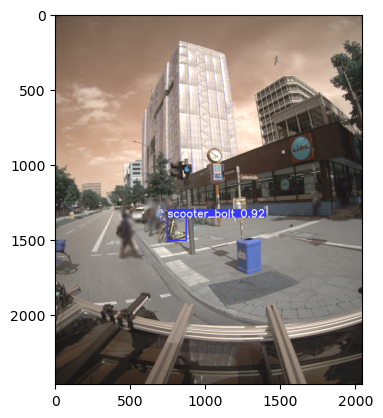

In [24]:
plt.imshow(img)
plt.show()

In [39]:
x, y, w, h = results1[0].boxes.xywh.cpu().numpy()[0]
h

155.73596

In [41]:
print(get_distance(h,1.16))

6.2618059206402075


In [29]:

def get_distance(pixel_hight, object_hight): # Übernommen aus der Masterarbeit  YanLing, mit Abwandelungen von Maximilian Weltz
    VFOV = 30.3
    HFOV = 45.9

    IMAGE_ORIGINAL_HEIGHT = 1200
    IMAGE_ORIGINAL_WIDTH = 1920
    distance = ((object_hight/pixel_hight)*(IMAGE_ORIGINAL_HEIGHT/2))/np.tan(np.deg2rad(VFOV/2))
    return distance

In [40]:
def get_distance(pixel_hight, object_hight): # Übernommen aus der Masterarbeit  YanLing, mit Abwandelungen von Maximilian Weltz
    VFOV = 111.383104
    IMAGE_ORIGINAL_HEIGHT = 2464
    distance = ((object_hight/pixel_hight)*(IMAGE_ORIGINAL_HEIGHT/2))/np.tan(np.deg2rad(VFOV/2))
    return distance

In [14]:
from tf.transformations import quaternion_from_euler

q = quaternion_from_euler(0, 0, np.deg2rad(90), 'syxz')
q